In [4]:
import sys

sys.path.append('.')

import model

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

This time, run the model with no contact tracing at all.

In [6]:
N = 2000
K = 4
p_star = 0.256

In [4]:
def ws_case_generator(N, K, p_star):
    def wscg(**kwargs):
        return model.watts_strogatz_case_p_star(N, K, p_star, **kwargs)
    
    return wscg

This time, assume all the agents are adopters.
We will use $(q,r)$ to regulate the percentage of distant and close edgees that are traced.

In [5]:
## Population parameters:
base_params = {
    # Node parameter
    'A' : 1, # This is A* from the second study.
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## all edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

In [6]:
conditions = {
    'q-0.0_r-0.0' : {'C' : model.qr_knockout(0.0, 0.0), 'q' : 0.0, 'r' : 0.0},
    'q-0.0_r-0.1' : {'C' : model.qr_knockout(0.0, 0.1), 'q' : 0.0, 'r' : 0.1},
    'q-0.0_r-0.2' : {'C' : model.qr_knockout(0.0, 0.2), 'q' : 0.0, 'r' : 0.2},
    'q-0.0_r-0.3' : {'C' : model.qr_knockout(0.0, 0.3), 'q' : 0.0, 'r' : 0.3},
    'q-0.0_r-0.4' : {'C' : model.qr_knockout(0.0, 0.4), 'q' : 0.0, 'r' : 0.4},
    'q-0.0_r-0.5' : {'C' : model.qr_knockout(0.0, 0.5), 'q' : 0.0, 'r' : 0.5},
    'q-0.0_r-0.6' : {'C' : model.qr_knockout(0.0, 0.6), 'q' : 0.0, 'r' : 0.6},
    'q-0.0_r-0.7' : {'C' : model.qr_knockout(0.0, 0.7), 'q' : 0.0, 'r' : 0.7},
    'q-0.0_r-0.8' : {'C' : model.qr_knockout(0.0, 0.8), 'q' : 0.0, 'r' : 0.8},
    'q-0.0_r-0.9' : {'C' : model.qr_knockout(0.0, 0.9), 'q' : 0.0, 'r' : 0.9},
    'q-0.0_r-1.0' : {'C' : model.qr_knockout(0.0, 1.0), 'q' : 0.0, 'r' : 1.0},
    'q-0.2_r-0.0' : {'C' : model.qr_knockout(0.2, 0.0), 'q' : 0.2, 'r' : 0.0},
    'q-0.2_r-0.1' : {'C' : model.qr_knockout(0.2, 0.1), 'q' : 0.2, 'r' : 0.1},
    'q-0.2_r-0.2' : {'C' : model.qr_knockout(0.2, 0.2), 'q' : 0.2, 'r' : 0.2},
    'q-0.2_r-0.3' : {'C' : model.qr_knockout(0.2, 0.3), 'q' : 0.2, 'r' : 0.3},
    'q-0.2_r-0.4' : {'C' : model.qr_knockout(0.2, 0.4), 'q' : 0.2, 'r' : 0.4},
    'q-0.2_r-0.5' : {'C' : model.qr_knockout(0.2, 0.5), 'q' : 0.2, 'r' : 0.5},
    'q-0.2_r-0.6' : {'C' : model.qr_knockout(0.2, 0.6), 'q' : 0.2, 'r' : 0.6},
    'q-0.2_r-0.7' : {'C' : model.qr_knockout(0.2, 0.7), 'q' : 0.2, 'r' : 0.7},
    'q-0.2_r-0.8' : {'C' : model.qr_knockout(0.2, 0.8), 'q' : 0.2, 'r' : 0.8},
    'q-0.2_r-0.9' : {'C' : model.qr_knockout(0.2, 0.9), 'q' : 0.2, 'r' : 0.9},
    'q-0.2_r-1.0' : {'C' : model.qr_knockout(0.2, 1.0), 'q' : 0.2, 'r' : 1.0},
    'q-0.4_r-0.0' : {'C' : model.qr_knockout(0.4, 0.0), 'q' : 0.4, 'r' : 0.0},
    'q-0.4_r-0.1' : {'C' : model.qr_knockout(0.4, 0.1), 'q' : 0.4, 'r' : 0.1},
    'q-0.4_r-0.2' : {'C' : model.qr_knockout(0.4, 0.2), 'q' : 0.4, 'r' : 0.2},
    'q-0.4_r-0.3' : {'C' : model.qr_knockout(0.4, 0.3), 'q' : 0.4, 'r' : 0.3},
    'q-0.4_r-0.4' : {'C' : model.qr_knockout(0.4, 0.4), 'q' : 0.4, 'r' : 0.4},
    'q-0.4_r-0.5' : {'C' : model.qr_knockout(0.4, 0.5), 'q' : 0.4, 'r' : 0.5},
    'q-0.4_r-0.6' : {'C' : model.qr_knockout(0.4, 0.6), 'q' : 0.4, 'r' : 0.6},
    'q-0.4_r-0.7' : {'C' : model.qr_knockout(0.4, 0.7), 'q' : 0.4, 'r' : 0.7},
    'q-0.4_r-0.8' : {'C' : model.qr_knockout(0.4, 0.8), 'q' : 0.4, 'r' : 0.8},
    'q-0.4_r-0.9' : {'C' : model.qr_knockout(0.4, 0.9), 'q' : 0.4, 'r' : 0.9},
    'q-0.4_r-1.0' : {'C' : model.qr_knockout(0.4, 1.0), 'q' : 0.4, 'r' : 1.0},
    'q-0.6_r-0.0' : {'C' : model.qr_knockout(0.6, 0.0), 'q' : 0.6, 'r' : 0.0},
    'q-0.6_r-0.1' : {'C' : model.qr_knockout(0.6, 0.1), 'q' : 0.6, 'r' : 0.1},
    'q-0.6_r-0.2' : {'C' : model.qr_knockout(0.6, 0.2), 'q' : 0.6, 'r' : 0.2},
    'q-0.6_r-0.3' : {'C' : model.qr_knockout(0.6, 0.3), 'q' : 0.6, 'r' : 0.3},
    'q-0.6_r-0.4' : {'C' : model.qr_knockout(0.6, 0.4), 'q' : 0.6, 'r' : 0.4},
    'q-0.6_r-0.5' : {'C' : model.qr_knockout(0.6, 0.5), 'q' : 0.6, 'r' : 0.5},
    'q-0.6_r-0.6' : {'C' : model.qr_knockout(0.6, 0.6), 'q' : 0.6, 'r' : 0.6},
    'q-0.6_r-0.7' : {'C' : model.qr_knockout(0.6, 0.7), 'q' : 0.6, 'r' : 0.7},
    'q-0.6_r-0.8' : {'C' : model.qr_knockout(0.6, 0.8), 'q' : 0.6, 'r' : 0.8},
    'q-0.6_r-0.9' : {'C' : model.qr_knockout(0.6, 0.9), 'q' : 0.6, 'r' : 0.9},
    'q-0.6_r-1.0' : {'C' : model.qr_knockout(0.6, 1.0), 'q' : 0.6, 'r' : 1.0},
    'q-0.8_r-0.0' : {'C' : model.qr_knockout(0.8, 0.0), 'q' : 0.8, 'r' : 0.0},
    'q-0.8_r-0.1' : {'C' : model.qr_knockout(0.8, 0.1), 'q' : 0.8, 'r' : 0.1},
    'q-0.8_r-0.2' : {'C' : model.qr_knockout(0.8, 0.2), 'q' : 0.8, 'r' : 0.2},
    'q-0.8_r-0.3' : {'C' : model.qr_knockout(0.8, 0.3), 'q' : 0.8, 'r' : 0.3},
    'q-0.8_r-0.4' : {'C' : model.qr_knockout(0.8, 0.4), 'q' : 0.8, 'r' : 0.4},
    'q-0.8_r-0.6' : {'C' : model.qr_knockout(0.8, 0.6), 'q' : 0.8, 'r' : 0.6},
    'q-0.8_r-0.8' : {'C' : model.qr_knockout(0.8, 0.8), 'q' : 0.8, 'r' : 0.8},
    'q-0.8_r-1.0' : {'C' : model.qr_knockout(0.8, 1.0), 'q' : 0.8, 'r' : 1.0},
    'q-1.0_r-0.0' : {'C' : model.qr_knockout(1.0, 0.0), 'q' : 1.0, 'r' : 0.0},
    'q-1.0_r-0.1' : {'C' : model.qr_knockout(1.0, 0.1), 'q' : 1.0, 'r' : 0.1},
    'q-1.0_r-0.2' : {'C' : model.qr_knockout(1.0, 0.2), 'q' : 1.0, 'r' : 0.2},
    'q-1.0_r-0.4' : {'C' : model.qr_knockout(1.0, 0.4), 'q' : 1.0, 'r' : 0.4},
    'q-1.0_r-0.6' : {'C' : model.qr_knockout(1.0, 0.6), 'q' : 1.0, 'r' : 0.6},
    'q-1.0_r-0.8' : {'C' : model.qr_knockout(1.0, 0.8), 'q' : 1.0, 'r' : 0.8},
    'q-1.0_r-1.0' : {'C' : model.qr_knockout(1.0, 1.0), 'q' : 1.0, 'r' : 1.0},
}

In [7]:
def dfr(rs):
    return pd.DataFrame(
        [r for case in rs 
         for r in model.data_from_results(rs, case)])

In [8]:
runs = 100
base_params['A'] = 1

rs = model.experiment(
    ws_case_generator(N, K, p_star),
    base_params,
    conditions,
    runs)

temp = dfr(rs)
temp.to_csv('qr_study.csv')
#del rs

Starting q-0.0_r-0.0
Initializing input graphs
graphs prepared in 5.233989783999277
Finished q-0.0_r-0.0 in 315.495708360002
Starting q-0.0_r-0.1
Initializing input graphs
graphs prepared in 5.022402014001273
Finished q-0.0_r-0.1 in 311.3851773770002
Starting q-0.0_r-0.2
Initializing input graphs
graphs prepared in 5.206820015999256
Finished q-0.0_r-0.2 in 242.42125361500075
Starting q-0.0_r-0.3
Initializing input graphs
graphs prepared in 5.168038140996941
Finished q-0.0_r-0.3 in 234.195111033001
Starting q-0.0_r-0.4
Initializing input graphs
graphs prepared in 4.5516448710004624
Finished q-0.0_r-0.4 in 209.0816964149999
Starting q-0.0_r-0.5
Initializing input graphs
graphs prepared in 4.346471079003095
Finished q-0.0_r-0.5 in 194.67915730700042
Starting q-0.0_r-0.6
Initializing input graphs
graphs prepared in 4.723717521999788
Finished q-0.0_r-0.6 in 148.96457896599895
Starting q-0.0_r-0.7
Initializing input graphs
graphs prepared in 4.426087924002786
Finished q-0.0_r-0.7 in 158.1786

In [7]:
temp = pd.read_csv('qr_study.csv')

In [8]:
temp.head()

,Unnamed: 0,time,A,W,C,beta_hat,alpha,gamma,zeta,limit,...,r,N,K,p,s_final,route_adjacent_ratio,traced_edges,traced_edges_distant,case,infected_ratio
0,0,230,1,0.5,NaN,0.4,0.25,0.1,0.1,10,...,0.0,2000,4,0.256,676,0.697657,0,0,q-0.0_r-0.0,0.6620
1,1,6,1,0.5,NaN,0.4,0.25,0.1,0.1,10,...,0.0,2000,4,0.256,1998,1.000000,0,0,q-0.0_r-0.0,0.0010
2,2,215,1,0.5,NaN,0.4,0.25,0.1,0.1,10,...,0.0,2000,4,0.256,689,0.693130,0,0,q-0.0_r-0.0,0.6555
3,3,3,1,0.5,NaN,0.4,0.25,0.1,0.1,10,...,0.0,2000,4,0.256,1997,1.000000,0,0,q-0.0_r-0.0,0.0015
4,4,8,1,0.5,NaN,0.4,0.25,0.1,0.1,10,...,0.0,2000,4,0.256,1998,1.000000,0,0,q-0.0_r-0.0,0.0010


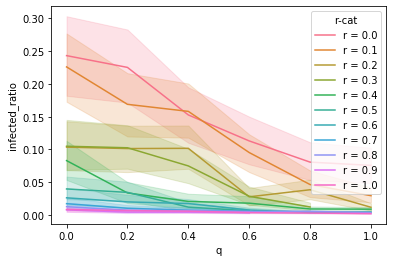

In [9]:
temp["r-cat"] = temp["r"].apply(lambda x: f"r = {x}")
temp["q-cat"] = temp["q"].apply(lambda x: f"q = {x}")

splot = sns.lineplot(x='q', y='infected_ratio', hue="r-cat", data=temp)

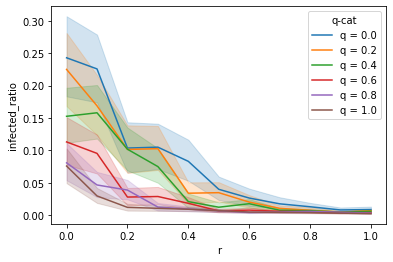

In [10]:
splot = sns.lineplot(x='r', y='infected_ratio', hue="q-cat", data=temp)

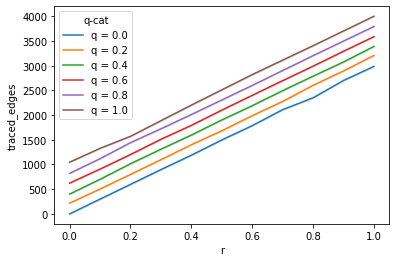

In [11]:
splot = sns.lineplot(x='r', y='traced_edges', hue="q-cat", data=temp)

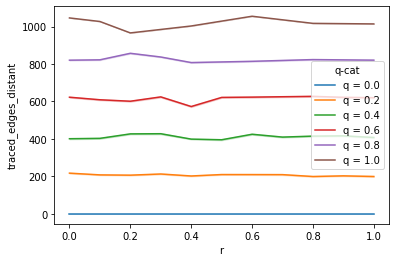

In [12]:
splot = sns.lineplot(x='r', y='traced_edges_distant', hue="q-cat", data=temp)

In [14]:
data = temp

data['traced_edges_close'] = data['traced_edges'] - data['traced_edges_distant']
data['traced_edges_ratio'] = data['traced_edges'] / (data['N'] * data['K'] / 2)
data['traced_edges_distant_ratio'] = data['traced_edges_distant'] / data['traced_edges']

data['D'] = (data['p'] * data['q']) / ((1 - data['p']) * data['r'] + data['p'] * data['q'])
data['T'] = ((1 - data['p']) * data['r'] + data['p'] * data['q'])

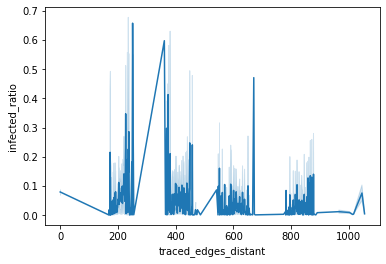

In [15]:
splot = sns.lineplot(x='traced_edges_distant', y='infected_ratio', data=temp)

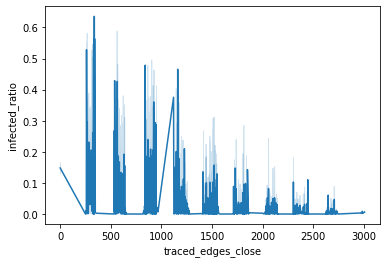

In [16]:
splot = sns.lineplot(x='traced_edges_close', y='infected_ratio', data=temp)

Computing a few other statistics on the data.

(array([100.,   0.,   0.,   0.,   6.,  87.,  15.,  88.,   4.,  46.,  53.,
         12.,  66.,  24.,  56., 128.,  33.,  64.,  26.,  48., 132.,  49.,
        119.,  45.,  27.,  59., 135., 118.,  80.,  89.,  78.,  30.,  77.,
        106.,  57.,  85.,  96., 106.,  89., 114.,  61.,  40.,  91.,  82.,
        107.,  62.,  35.,  48.,  38.,  93.,  75.,  58., 104.,  75.,  95.,
         84.,  61.,  44.,  75.,  73.,  44.,  39.,  49.,  34.,  80.,  94.,
         54., 117.,  48.,  87.,  78.,  49.,  67.,  24., 158.,  34.,  53.,
         41.,   6.,  73., 112.,  44.,  54.,  17., 113.,  76.,   7.,   0.,
          4.,  71.,  25.,   0.,   0.,   0.,  77.,  23.,   0.,   0.,   0.,
        100.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560.

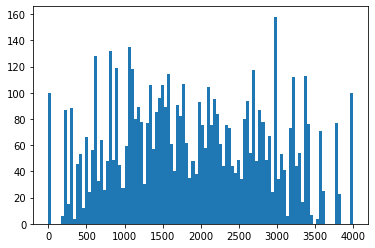

In [17]:
plt.hist(data['traced_edges'], bins = 100)

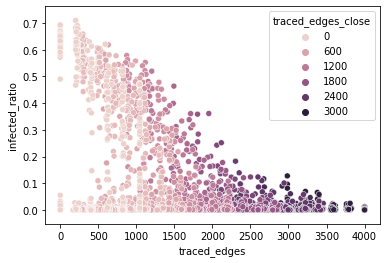

In [18]:
g = sns.scatterplot(
    data = data,
    y = 'infected_ratio',
    x = 'traced_edges',
    hue = 'traced_edges_close'
)

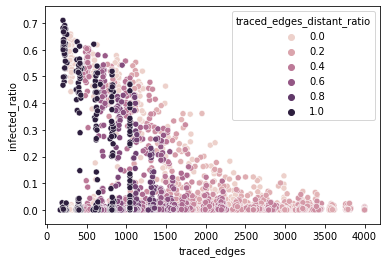

In [19]:
g = sns.scatterplot(
    data = data,
    y = 'infected_ratio',
    x = 'traced_edges',
    hue = 'traced_edges_distant_ratio'
)

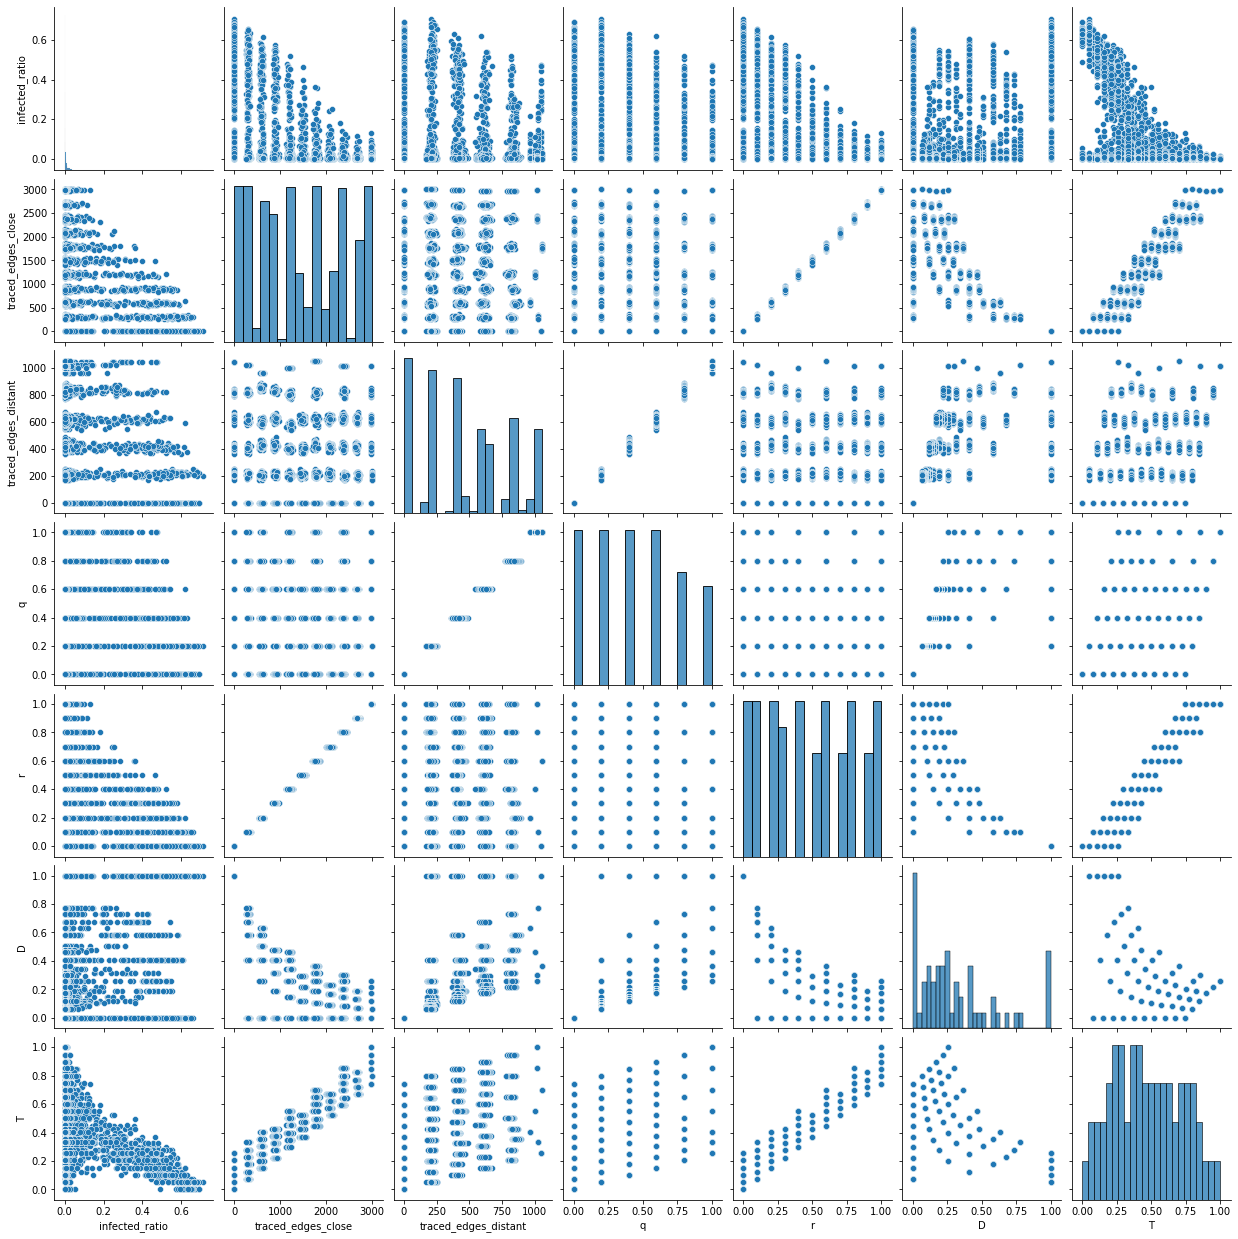

In [20]:
sns.pairplot(
    data[[
        'infected_ratio',
        'traced_edges_close',
        'traced_edges_distant',
        'q',
        'r',
        'D',
        'T']
    ])

[Text(0, 0.5, 'average final infected ratio'),
 Text(0.5, 0, 'T - traced edges')]

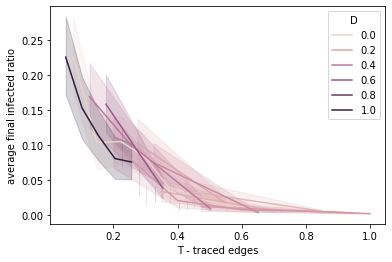

In [21]:
data["D-cat"] = data["D"].apply(lambda x: f"D = {round(x,2)}")


splot = sns.lineplot(
    x='T',
    y='infected_ratio',
    data=data,
    hue = 'D'
)

splot.set(#xscale="log",
          xlabel='T - traced edges',
          ylabel='average final infected ratio')

[Text(33.0, 0.5, 'traced_edges_close'),
 Text(0.5, 15.0, 'traced_edges_distant')]

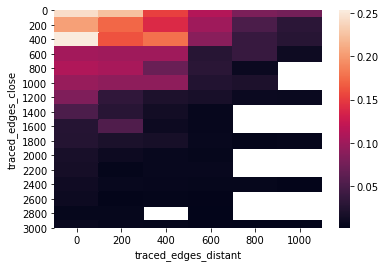

In [22]:
g, xyz, db = model.binned_heatmap(
    data,
    x = 'traced_edges_distant',
    x_base = 200,
    y = 'traced_edges_close',
    y_base = 200,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      xlabel='traced_edges_distant',
      ylabel='traced_edges_close')

[Text(33.0, 0.5, 'traced_edges'), Text(0.5, 15.0, 'traced_edges_distant')]

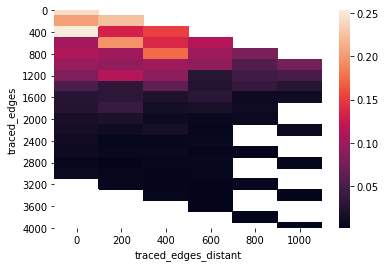

In [23]:
g, xyz, db = model.binned_heatmap(
    data,
    x = 'traced_edges_distant',
    x_base = 200,
    y = 'traced_edges',
    y_base = 200,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      xlabel='traced_edges_distant',
      ylabel='traced_edges')